In [22]:
import pandas as pd

# Завантажте дані
data = pd.read_csv('titanic.csv')

# Перегляньте перші 5 рядків даних
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
print(data.isnull().sum())

# Замініть відсутні значення в 'Age' на медіану
data['Age'].fillna(data['Age'].median(), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
# Видаліть рядок 'Cabin', оскільки він має багато відсутніх значень
data = data.drop('Cabin', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [26]:
#можна замінити занчення замість того щоб видаляти так як NA значень досить мало ми їх замінемо 
most_common = data['Embarked'].value_counts().idxmax()
data['Embarked'].fillna(most_common, inplace=True)

#або можна видалити
#data = data.dropna(subset=['Embarked'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot: xlabel='Age', ylabel='Survived'>

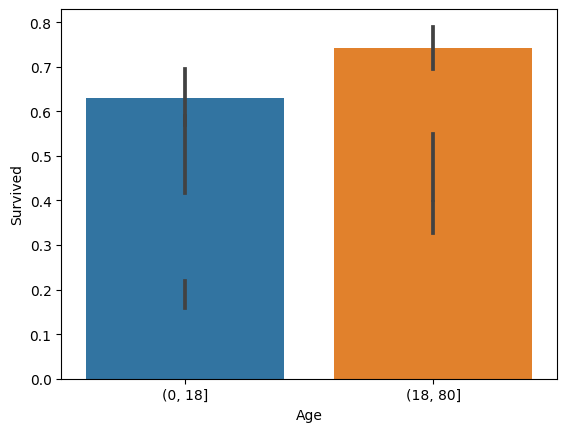

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Візуалізуйте виживання в залежності від статі
sns.barplot(x="Sex", y="Survived", data=data)

# Візуалізуйте виживання в залежності від класу каюти
sns.barplot(x="Pclass", y="Survived", data=data)

# Візуалізуйте виживання в залежності від віку
age = pd.cut(data['Age'], [0, 18, 80])
sns.barplot(x=age, y="Survived", data=data)


<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

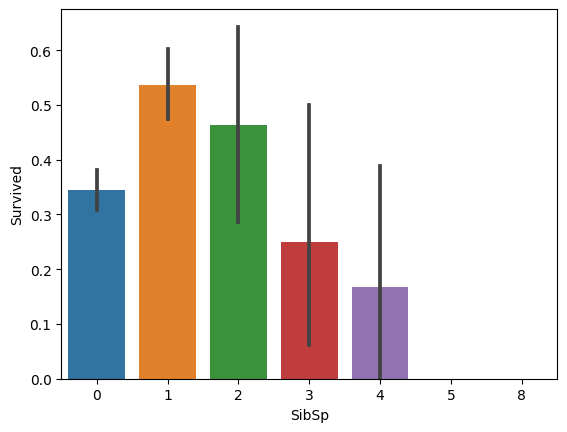

In [29]:
sns.barplot(x="SibSp", y="Survived", data=data)

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

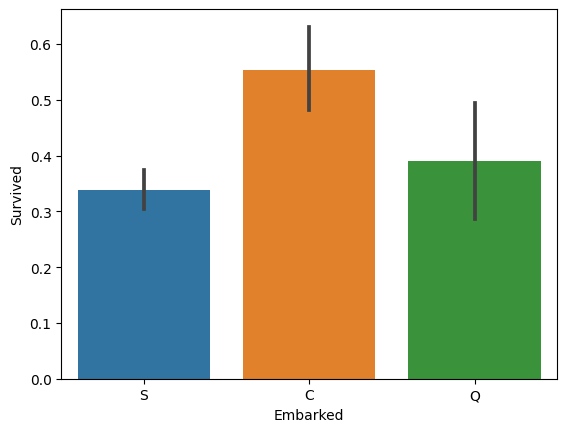

In [30]:
sns.barplot(x="Embarked", y="Survived", data=data)

In [31]:
data = pd.get_dummies(data, columns=["Sex", "Pclass", "Embarked"])